In [8]:
import numpy as np


class BiMax():
    """Method to find all maximal biclusters in a boolean array.
    Attributes
    ----------
    `rows_` : array-like, shape (n_row_clusters, n_rows)
        Results of the clustering. `rows[i, r]` is True if cluster `i`
        contains row `r`. Available only after calling ``fit``.
    `columns_` : array-like, shape (n_column_clusters, n_columns)
        Results of the clustering, like `rows`.
    """

    def fit(self, X):
        """Creates a biclustering for X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        """
        n_rows, n_cols = X.shape
        result = self._conquer(X, set(range(n_rows)),
                               set(range(n_cols)), [])
        row_ind = []
        col_ind = []
        for rows, cols in result:
            ri, ci = self._get_indicators(rows, cols, X.shape)
            row_ind.append(ri)
            col_ind.append(ci)
        self.rows_ = np.vstack(row_ind)
        self.columns_ = np.vstack(col_ind)

    def _conquer(self, data, rows, cols, col_sets):
        if np.all(data[np.array(list(rows))[:, np.newaxis], list(cols)]):
            return [(rows, cols)]
        rows_all, rows_none, rows_some, cols_all, cols_none = \
            self._divide(data, rows, cols, col_sets)
        results_all = []
        results_none = []
        if rows_all:
            results_all = self._conquer(data, rows_all.union(rows_some),
                                        cols_all, col_sets)
        if rows_none and not rows_some:
            results_none = self._conquer(data, rows_none, cols_none, col_sets)
        elif rows_some:
            new_col_sets = col_sets[:]
            new_col_sets.append(cols_none)
            results_none = self._conquer(data,
                                         rows_some.union(rows_none),
                                         cols_all.union(cols_none),
                                         new_col_sets)
        return results_all + results_none

    def _divide(self, data, rows, cols, col_sets):
        new_rows, nz_cols = self._reduce(data, rows, cols, col_sets)
        n_cols = len(cols)
        cols_all = cols
        for r in new_rows:
            if 0 < len(nz_cols[r]) < n_cols:
                cols_all = nz_cols[r]
                break
        cols_none = cols.difference(cols_all)
        rows_all = set()
        rows_none = set()
        rows_some = set()
        for r in new_rows:
            if nz_cols[r].issubset(cols_all):
                rows_all.add(r)
            elif nz_cols[r].issubset(cols_none):
                rows_none.add(r)
            else:
                rows_some.add(r)
        return rows_all, rows_none, rows_some, cols_all, cols_none

    def _reduce(self, data, rows, cols, col_sets):
        row_idxs = np.array(list(rows))
        col_idxs = np.array(list(cols))
        subarray = data[row_idxs[:, np.newaxis], col_idxs]
        nz_cols = {row_idxs[r]: set(col_idxs[np.nonzero(subarray[r])[0]])
                   for r in range(row_idxs.shape[0])}
        new_rows = set(r for r in row_idxs
                       if nz_cols[r] and
                       all(nz_cols[r].intersection(cset)
                           for cset in col_sets))
        return new_rows, nz_cols

    def _get_indicators(self, rows, columns, shape):
        """Convert indices to indicator vectors"""
        row_ind = np.zeros(shape[0], dtype=bool)
        col_ind = np.zeros(shape[1], dtype=bool)
        row_ind[list(rows)] = True
        col_ind[list(columns)] = True
        return row_ind, col_ind

In [9]:
from random import randint
def createBinaryMatrix(m,n):
    M = []
    for i in range(m):
        row = []
        for j in range(n):
            val = randint(0,1)
            row.append(val)

        M.append(row)
    return M

# m is rows and n is columns
m = 20
n =20
bin_mat = createBinaryMatrix(m,n)

# Print the binary matrix
'''
for row in bin_mat:
    print(row)
'''
arr_bin_mat = np.array(bin_mat)
n_rows, n_cols = arr_bin_mat.shape

print(arr_bin_mat)

model = BiMax()
model.fit(arr_bin_mat)

# get largest bicluster
idx = np.argmax(list(model.rows_[i].sum() * model.columns_[i].sum()
                     for i in range(len(model.rows_))))
bc = np.outer(model.rows_[idx], model.columns_[idx])



[[1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0]
 [1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0]
 [1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1]
 [0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1]
 [0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1]
 [0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0]
 [1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1]
 [1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0]
 [0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1]
 [1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1]
 [0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1]
 [1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0]
 [1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0]
 [1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1]
 [1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1]]


In [12]:
#print(idx)
print(bc)

[[False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False  True  True False False False False False False False
   True False  True False False False False  True]


([], [])

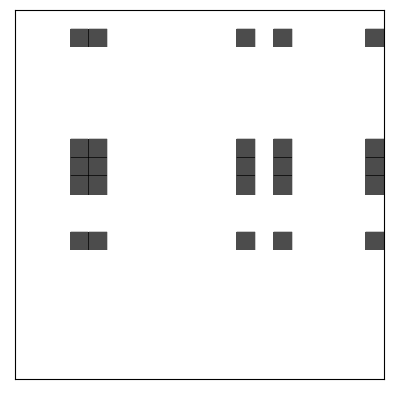

In [16]:


from matplotlib import pyplot as plt
# plot data and overlay largest bicluster
plt.pcolor(bin_mat, cmap=plt.cm.Greys, shading='auto')
plt.pcolor(bc, cmap=plt.cm.Greys, alpha=0.7, shading='auto')
plt.axis('scaled')
plt.xticks([])
plt.yticks([])

([], [])

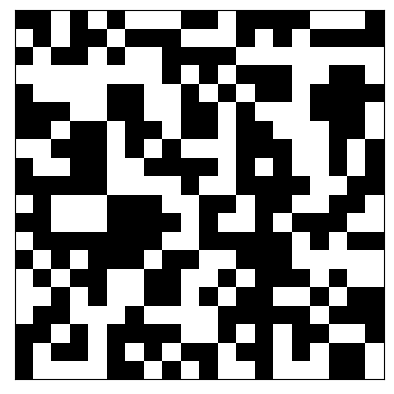

In [13]:
from matplotlib import pyplot as plt
# plot data and overlay largest bicluster
plt.pcolor(bin_mat, cmap=plt.cm.Greys, shading='auto')
# plt.pcolor(bc, cmap=plt.cm.Greys, alpha=0.7, shading='auto')
plt.axis('scaled')
plt.xticks([])
plt.yticks([])

In [17]:
model.rows_[idx], model.columns_[idx]

(array([False, False, False, False, False, False, False,  True, False,
        False,  True,  True,  True, False, False, False, False, False,
         True, False]),
 array([False, False, False,  True,  True, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False,  True]))

In [21]:
count = 0
for i in range (len(model.rows_[idx])):
    for j in range(len(model.columns_[idx])):
        if model.rows_[idx][i] == True and model.columns_[idx][j] == True:
            print(bc[i][j])
            count += 1

print(count)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
25
